# Template Matching
![bbox-example-image](./img/bbox-example-image.jpg)
To figure out when template matching works and when it doesn't, let's play around with the OpenCV `cv2.matchTemplate()` function! In the bounding boxes exercise, I found six cars in the image above. This time, we're going to play the opposite game. Assuming we know these six cars are what we're looking for, we can use them as templates and search the image for matches.

![cutouts.jpg](./img/cutouts.jpg)

The goal in this exercise is to write a function that takes in an image and a list of templates, and returns a list of the best fit location (bounding box) for each of the templates within the image. OpenCV provides you with the handy function `cv2.matchTemplate()` ([documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html)) to search the image, and `cv2.minMaxLoc()` ([documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?highlight=minmaxloc#cv2.minMaxLoc)) to extract the location of the best match.

You can choose between "squared difference" or "correlation" methods in using `cv2.matchTemplate()`, but keep in mind with squared differences you need to locate the global minimum difference to find a match, while for correlation, you're looking for a global maximum.

Follow along with [this tutorial](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) provided by OpenCV to try some different template matching techniques. The function you write should work like this:

```python
def find_matches(img, template_list):
    # Iterate over the list of templates
    # Use cv2.matchTemplate() to search the image for each template
    # NOTE: You can use any of the cv2.matchTemplate() search methods
    # Use cv2.minMaxLoc() to extract the location of the best match in each case
    # Compile a list of bounding box corners as output
    # Return the list of bounding boxes
```


**However**, the point of this exercise is not to discover why template matching works for vehicle detection, but rather, why it doesn't! So, after you have a working implementation of the `find_matches()` function, try it on the second image, `temp-matching-example-2.jpg`, which is currently commented out.

In the second image, all of the same six cars are visible (just a few seconds later in the video), but you'll find that **none** of the templates find the correct match! This is because with template matching we can only find very close matches, and changes in size or orientation of a car make it impossible to match with a template.

So, just to be clear, the goal here is to:

- Write a function that takes in an image and list of templates and returns a list of bounding boxes.
- Find that your function works well to locate the six example templates taken from the first image.
- Try your code on the second image, and find that template matching breaks easily.

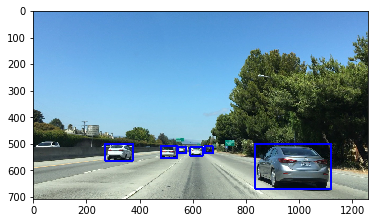

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

image_path = './img/'
cutout_path = './cutouts/'
image = mpimg.imread(image_path+'bbox-example-image.jpg')
templist = [cutout_path+'cutout1.jpg', cutout_path+'cutout2.jpg', cutout_path+'cutout3.jpg',
            cutout_path+'cutout4.jpg', cutout_path+'cutout5.jpg', cutout_path+'cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function to search for template matches
# and return a list of bounding boxes
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list



bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)